<a href="https://colab.research.google.com/github/logeshpalanivel/Brain_Stroke_Classification_Using_Naive_Bayes/blob/main/Brain_Stroke_Classification_Using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('/content/full_data.csv')

In [165]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [166]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [167]:
df.shape

(4981, 11)

In [168]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [170]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

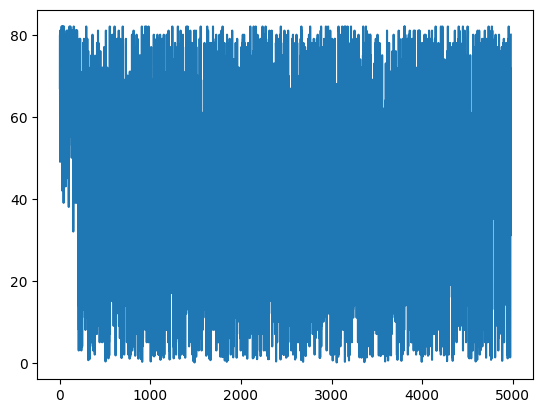

In [171]:
a=df['age']
plt.plot(a)

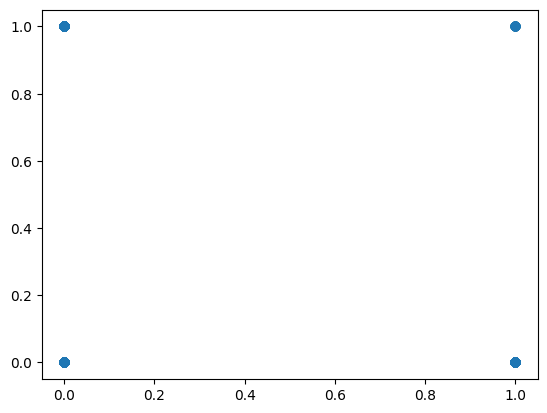

In [172]:
b=df['hypertension']
c=df['heart_disease']
plt.scatter(b,c)

<BarContainer object of 4981 artists>

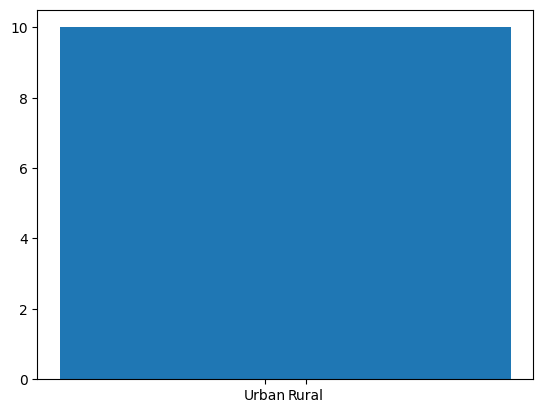

In [173]:
d=df['Residence_type']
plt.bar(d,width=10,height=10)


(array([2074.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2907.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

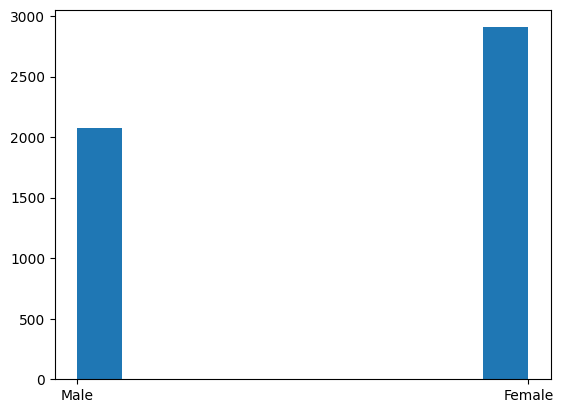

In [174]:
e=df['gender']
plt.hist(e)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = le.fit_transform(df[column])

In [177]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [179]:
X = df.drop('stroke',axis=1)
Y = df['stroke']

In [180]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,171.23,34.4,3
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1
4977,1,40.0,0,0,1,1,1,191.15,31.1,3
4978,0,45.0,1,0,1,0,0,95.02,31.8,3
4979,1,40.0,0,0,1,1,0,83.94,30.0,3


In [181]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [183]:
x_train.shape

(3735, 10)

In [184]:
x_test.shape

(1246, 10)

In [185]:
from sklearn.preprocessing import StandardScaler
c = StandardScaler()
x_train=c.fit_transform(x_train)

In [186]:
x_train

array([[-0.85203898, -0.76992324, -0.32760168, ...,  1.37219738,
        -0.8198263 ,  0.58661938],
       [-0.85203898, -1.47558671, -0.32760168, ..., -1.07747037,
        -1.92339014,  0.58661938],
       [ 1.17365522, -1.47558671, -0.32760168, ..., -0.78095606,
        -0.45197169, -1.28445098],
       ...,
       [-0.85203898,  0.55319576, -0.32760168, ...,  2.62012048,
         2.10829642,  0.58661938],
       [ 1.17365522,  0.59729972, -0.32760168, ...,  0.03191736,
         0.15130988,  0.58661938],
       [-0.85203898, -1.51969067, -0.32760168, ..., -0.34966252,
        -1.43782205, -1.28445098]])

In [187]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb

GaussianNB()

In [188]:
y_pred = gnb.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 1])

In [189]:
from sklearn.metrics import accuracy_score , confusion_matrix
a=accuracy_score(y_test,y_pred)
a

0.3451043338683788

In [190]:
c=confusion_matrix(y_test,y_pred)
c

array([[402, 785],
       [ 31,  28]])

In [191]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
x_train=s.fit_transform(x_train)

In [192]:
from sklearn.naive_bayes import MultinomialNB
nmb=MultinomialNB()
nmb.fit(x_train,y_train)

MultinomialNB()

In [193]:
y_pred1 = nmb.predict(x_test)
y_pred1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [194]:
a=accuracy_score(y_test,y_pred1)
a

0.04735152487961477

In [195]:
c=confusion_matrix(y_test,y_pred1)
c

array([[   0, 1187],
       [   0,   59]])

In [196]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [197]:
y_pred2 = bnb.predict(x_test)
y_pred2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [198]:
a= accuracy_score(y_test,y_pred2)
a

0.9518459069020867

In [199]:
c=confusion_matrix(y_test,y_pred2)
c

array([[1186,    1],
       [  59,    0]])

In [200]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(x_train,y_train)


ComplementNB()

In [201]:
y_pred3 = cnb.predict(x_test)
y_pred3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ComplementNB was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [202]:
a = accuracy_score(y_test,y_pred3)
a

0.04735152487961477

In [203]:
c=confusion_matrix(y_test,y_pred3)
c

array([[   0, 1187],
       [   0,   59]])